9. This question involves the use of multiple linear regression on the `Auto` data set.

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

(b) Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the `name` variable, which is qualitative.

(c) Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summary()` function to print the results. Comment on the output. For instance:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

(d) Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

(e) Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

(f) Try a few different transformations of the variables, such as `log(X)`, `X^(1/2)`, `X^2`. Comment on your findings.

In [1]:
library(ISLR2)
library(ggplot2)
library(GGally)
library(corrplot)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.90 loaded



In [2]:
Auto <- na.omit(Auto)
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


(a) Produce a scatterplot matrix which includes all of the variables in the data set.

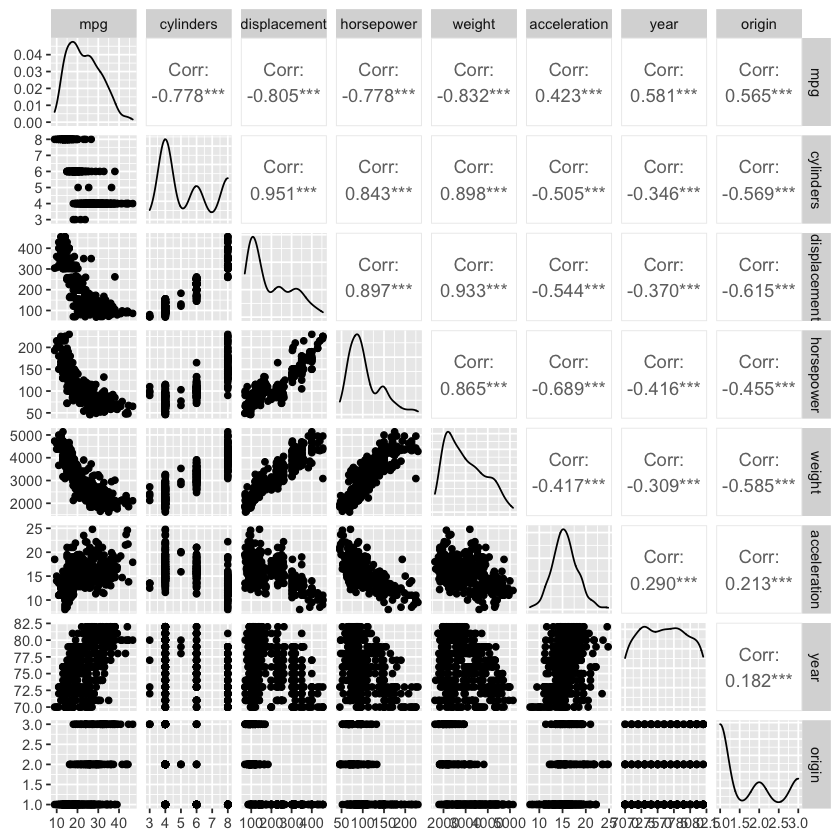

In [3]:
g <- ggpairs(Auto, columns = 1:8)#, ggplot2::aes(colour = species))
g

(b) Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the `name` variable, which is qualitative.

In [4]:
correlations <- cor(Auto[, 1:8])
correlations

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


(c) Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summary()` function to print the results.

In [5]:
lm.fit <- lm(mpg ~ . - name, data = Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


i. Is there a relationship between the predictors and the response?

This question can be answered by fitting a multiple regression model of `mpg` onto the rest of the predictors except `name`, and testing the hypothesis,

$H_0: \beta_{\text{cylinders}} = \beta_{\text{displacement}} = \ldots = \beta_{\text{prigin}} = 0$. 

The $F$-statistic can be used to determine whether or not we should reject this null hypothesis. 
In this case the $p$-value corresponding to the $F$-statistic is very low, indicating clear evidence of a relationship between all the predictors and `mpg`.

If we have a look at each of the predictors $p$-value, we could be directed to the conclusion to reject the null hypothesis and that there are some cases where the coefficients are zero. However, this is done by keeping the rest of the predictors fixed.

We should keep in mind that the approach of using an $F$-statistic to test for any association between the predictors and the response works when the number of predictors $p$ is relatively small, and certainly small compared to the number of observations $n$.

ii. Which predictors appear to have a statistically significant relationship to the response?

To answer this question, we can examine the $p$-values associated with each predictor’s $t$-statistic. 
In the multiple linear regression, the $p$-values for `displacement`, `weight`, `year` and `origin` are low, but the $p$-value for `cylinders`, `horsepower` and `acceleration` are not. 
This suggests that only `displacement`, `weight`, `year` and `origin` are related to `mpg`.

iii. What does the coefficient for the year variable suggest?

The `year` variable is the year of the model of the car. The coefficient equal to 0.75 indicates the miles per gallon increase (since it is positive) per year of the model. As we get closer to the present day, the new car models will increase 0.75 mpg per year, while keeping the rest of the predictors fixed.

(d) Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

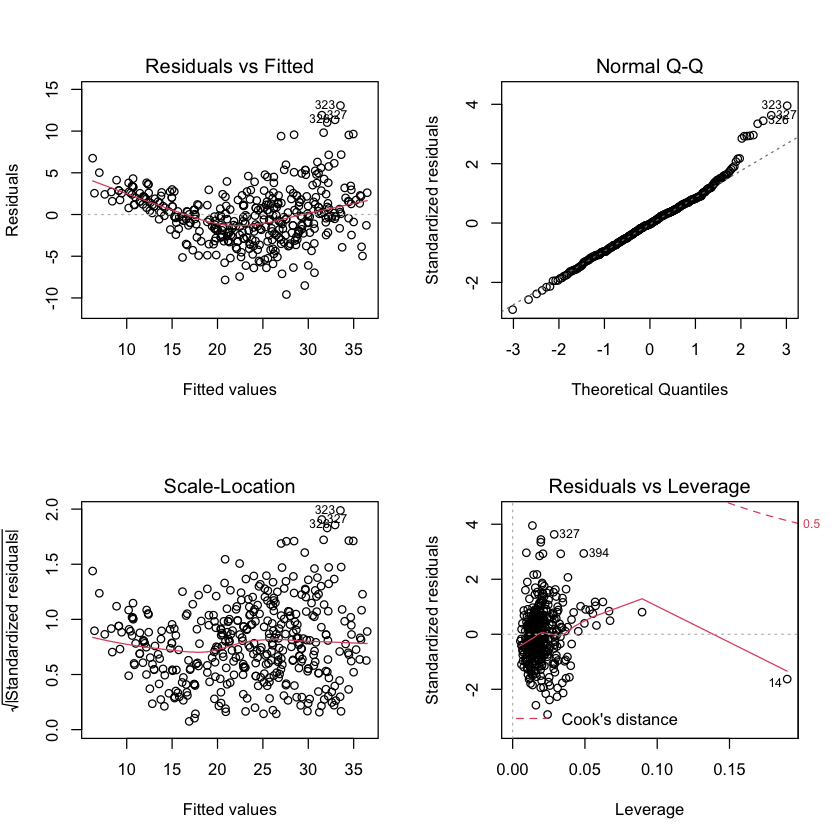

In [6]:
par(mfrow = c(2, 2))
plot(lm.fit)

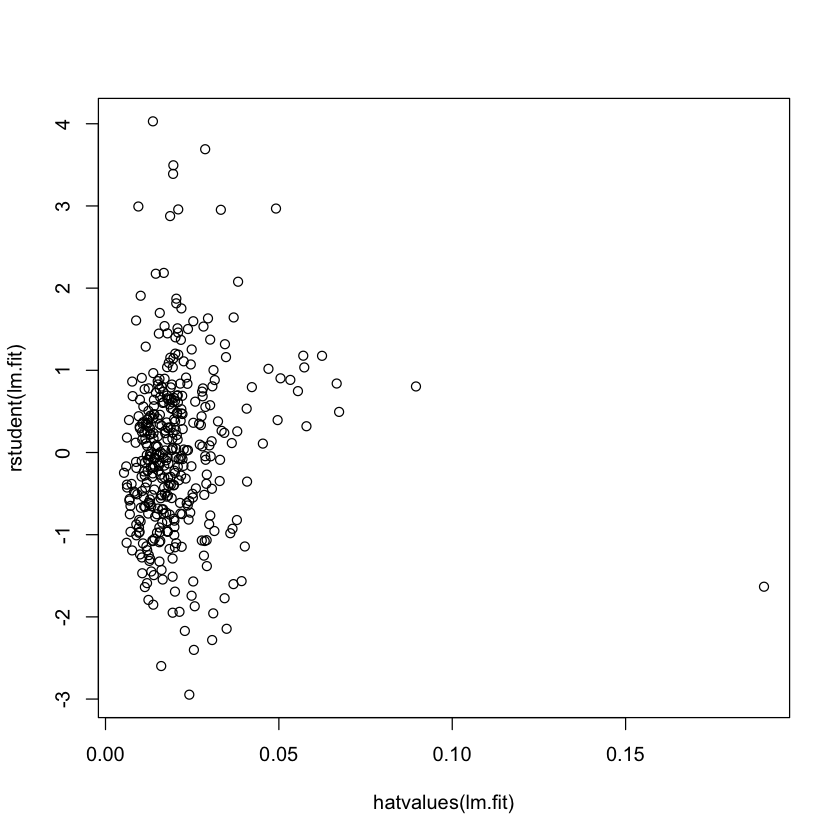

In [7]:
plot(hatvalues(lm.fit), rstudent(lm.fit))

The Residuals vs Fitted panel suggests that the linear model proposed might not be the best option, given the non-linear pattern. Maybe extending the linear model with interaction (synergy) terms could help.

The linearity of the normal Q-Q plot suggest that the data are normally distributed, except beyond 2 on the $x$-axis, where there seem to be a problem with those points.

The bottom-left panel does not reveal any pattern, but again those points that could be outliers or have high leverage.

The Residuals vs Leverage panel indicates that point 14 has a high leverage (not normal value for a predictor). Also, there seem to be outliers above 3 on the $y$-axis.

(e) Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

We could use the pair plot above to determine some collinearity between predictors and use those to build up some interactions. As collinearity is not particularly good for linear regression, one way to avoid it is to mixed those predictors that are collinear, into another term. However, notice that although they are collinear, we should keep them in the model as well, as the hierarchical principle suggests.

For instance, we could build two models with interactions between `weight` with `horsepower`, and `displacement` with `cylinders`.

Also, we could drop one of the collinear predictors and just pick one of them, as the trend would be the same. 

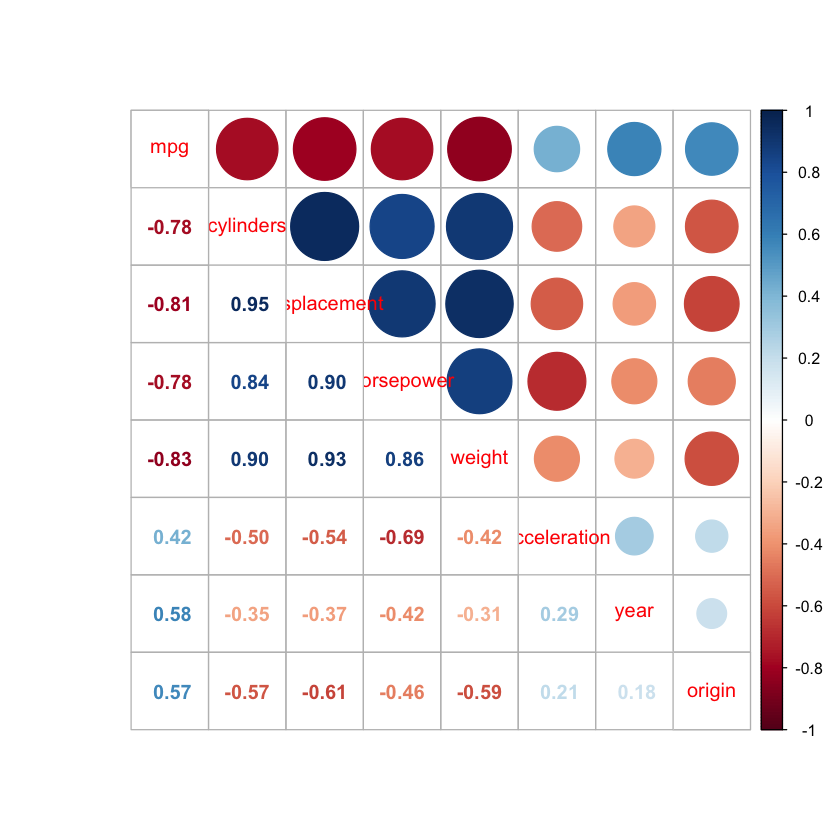

In [9]:
corrplot.mixed(cor(Auto[, c(1:8)]))

In [28]:
summary(lm(mpg ~ . + year * displacement + cylinders * weight + cylinders * displacement - name, data = Auto))


Call:
lm(formula = mpg ~ . + year * displacement + cylinders * weight + 
    cylinders * displacement - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5652 -1.5894 -0.1195  1.3317 13.0796 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -3.211e+01  8.093e+00  -3.968 8.66e-05 ***
cylinders              -4.025e+00  6.305e-01  -6.384 5.02e-10 ***
displacement            2.105e-01  4.147e-02   5.074 6.09e-07 ***
horsepower             -4.361e-02  1.294e-02  -3.371 0.000827 ***
weight                 -1.295e-02  2.009e-03  -6.447 3.46e-10 ***
acceleration            1.158e-01  8.644e-02   1.340 0.180980    
year                    1.247e+00  8.986e-02  13.874  < 2e-16 ***
origin                  6.927e-01  2.569e-01   2.696 0.007320 ** 
displacement:year      -2.812e-03  4.689e-04  -5.996 4.70e-09 ***
cylinders:weight        1.245e-03  2.967e-04   4.195 3.40e-05 ***
cylinders:displacement  1.141e-03  3.020e

The model fits better for single predictors with greater correlation with the response.

We could use all of the predictors with high correlation and then combine interactions with the others with them.

In [29]:
summary(lm(mpg ~ . + year * displacement + displacement * weight + horsepower * displacement - name, data = Auto))


Call:
lm(formula = mpg ~ . + year * displacement + displacement * weight + 
    horsepower * displacement - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4406 -1.4864 -0.0944  1.2439 13.4861 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -3.124e+01  8.390e+00  -3.724 0.000226 ***
cylinders                6.069e-01  2.970e-01   2.043 0.041728 *  
displacement             8.129e-02  4.168e-02   1.950 0.051880 .  
horsepower              -1.069e-01  2.966e-02  -3.605 0.000353 ***
weight                  -7.134e-03  1.284e-03  -5.556  5.2e-08 ***
acceleration            -2.921e-02  9.751e-02  -0.300 0.764671    
year                     1.111e+00  9.821e-02  11.317  < 2e-16 ***
origin                   5.266e-01  2.511e-01   2.097 0.036632 *  
displacement:year       -2.073e-03  5.117e-04  -4.050  6.2e-05 ***
displacement:weight      1.281e-05  3.750e-06   3.417 0.000702 ***
displacement:horsepower  2

(f) Try a few different transformations of the variables, such as `log(X)`, `X^(1/2)`, `X^2`. Comment on your findings.

In [36]:
summary(lm(mpg ~ . + I(log(horsepower)) - name, data = Auto))


Call:
lm(formula = mpg ~ . + I(log(horsepower)) - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5777 -1.6623 -0.1213  1.4913 12.0230 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         8.674e+01  1.106e+01   7.839 4.54e-14 ***
cylinders          -5.530e-02  2.907e-01  -0.190 0.849230    
displacement       -4.607e-03  7.108e-03  -0.648 0.517291    
horsepower          1.764e-01  2.269e-02   7.775 7.05e-14 ***
weight             -3.366e-03  6.561e-04  -5.130 4.62e-07 ***
acceleration       -3.277e-01  9.670e-02  -3.388 0.000776 ***
year                7.421e-01  4.534e-02  16.368  < 2e-16 ***
origin              8.976e-01  2.528e-01   3.551 0.000432 ***
I(log(horsepower)) -2.685e+01  2.652e+00 -10.127  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.959 on 383 degrees of freedom
Multiple R-squared:  0.8592,	Adjusted R-squared:  0.8562 
F-statistic: 292.1

In [35]:
summary(lm(mpg ~ . + I(sqrt(horsepower)) - name, data = Auto))


Call:
lm(formula = mpg ~ . + I(sqrt(horsepower)) - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5402 -1.6717 -0.0778  1.4861 11.9754 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.299e+01  7.251e+00   5.929 6.82e-09 ***
cylinders            6.037e-02  2.928e-01   0.206 0.836748    
displacement        -5.870e-03  7.156e-03  -0.820 0.412560    
horsepower           4.239e-01  4.532e-02   9.353  < 2e-16 ***
weight              -3.285e-03  6.604e-04  -4.975 9.87e-07 ***
acceleration        -3.342e-01  9.705e-02  -3.443 0.000638 ***
year                 7.398e-01  4.536e-02  16.308  < 2e-16 ***
origin               9.159e-01  2.526e-01   3.626 0.000326 ***
I(sqrt(horsepower)) -1.050e+01  1.039e+00 -10.104  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.961 on 383 degrees of freedom
Multiple R-squared:  0.8591,	Adjusted R-squared:  0.8561 
F-stati

In [34]:
summary(lm(mpg ~ . + I(horsepower^2) - name, data = Auto))


Call:
lm(formula = mpg ~ . + I(horsepower^2) - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5497 -1.7311 -0.2236  1.5877 11.9955 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.3236564  4.6247696   0.286 0.774872    
cylinders        0.3489063  0.3048310   1.145 0.253094    
displacement    -0.0075649  0.0073733  -1.026 0.305550    
horsepower      -0.3194633  0.0343447  -9.302  < 2e-16 ***
weight          -0.0032712  0.0006787  -4.820 2.07e-06 ***
acceleration    -0.3305981  0.0991849  -3.333 0.000942 ***
year             0.7353414  0.0459918  15.989  < 2e-16 ***
origin           1.0144130  0.2545545   3.985 8.08e-05 ***
I(horsepower^2)  0.0010060  0.0001065   9.449  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.001 on 383 degrees of freedom
Multiple R-squared:  0.8552,	Adjusted R-squared:  0.8522 
F-statistic: 282.8 on 8 and 383 DF,  p-value: < 2.2